In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.3MB/s 
     |████████████████████████████████| 6.5MB 24.0MB/s 
     |████████████████████████████████| 15.3MB 285kB/s 


In [ ]:
!pip install mapclassify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mapclassify
import geopandas as gpd
from shapely.geometry import Point
import descartes
from shapely.wkt import loads as load_wkt
%matplotlib inline

In [ ]:
world = gpd.read_file("cb_2018_us_county_500k.shp")
arkansas = world[world["STATEFP"] == "05"]

In [ ]:
#Loading combined data of hospitals, urgent care and pharmacies into one dataset.
HIFLD_data = pd.read_csv("precipitaton_centers.csv")
print(HIFLD_data.columns)

HIFLD_data.isnull().sum().sum()
#no null data


Index(['ID', 'NAME', 'ADDRESS', 'STATE', 'LATITUDE', 'LONGITUDE', 'TYPE',
       '01_2010', '02_2010', '03_2010',
       ...
       '04_2020', '05_2020', '06_2020', '07_2020', '08_2020', '09_2020',
       '10_2020', '11_2020', '12_2020', 'elevation'],
      dtype='object', length=140)


0

In [ ]:
precipitation = pd.read_csv("AR_monthly.csv")
precipitation.head()

precipitation.columns=['LATITUDE','LONGITUDE','Precipitation','geometry','Year','Month']
precipitation.head()


,LATITUDE,LONGITUDE,Precipitation,geometry,Year,Month
0,36.150002,-94.550003,0.092249,POINT (-94.55000305175781 36.15000152587891),2010,1
1,36.250000,-94.550003,0.088663,POINT (-94.55000305175781 36.25),2010,1
2,36.349998,-94.550003,0.085075,POINT (-94.55000305175781 36.34999847412109),2010,1
3,36.450001,-94.550003,0.081406,POINT (-94.55000305175781 36.45000076293945),2010,1
4,33.650002,-94.449997,0.130257,POINT (-94.44999694824219 33.65000152587891),2010,1


In [ ]:
#We know that on June 2010, April 2011 there was flood in Arkansas, just checking precipitation of that time

precipitation[(precipitation["Year"]==2010) & (precipitation["Month"]==6)]['Precipitation'].mean()
#0.09652632477761529

precipitation[(precipitation["Year"]==2011) & (precipitation["Month"]==4)]['Precipitation'].mean()
#0.3948584966715436

0.3948584966715436

In [ ]:
max_prec_by_geom = precipitation.groupby(['LONGITUDE','LATITUDE']).mean().reset_index()
print(max_prec_by_geom['Precipitation'].max())

0.176043499121212


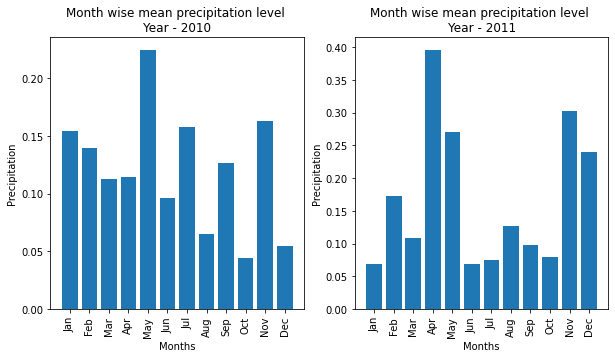

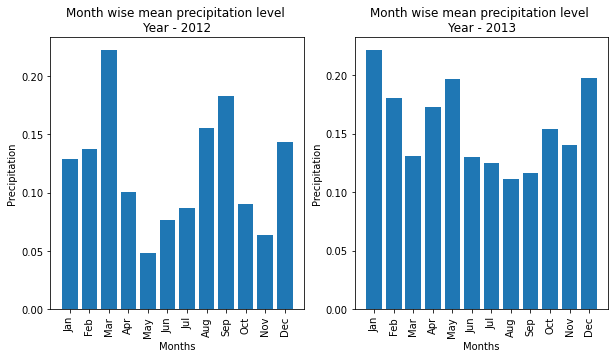

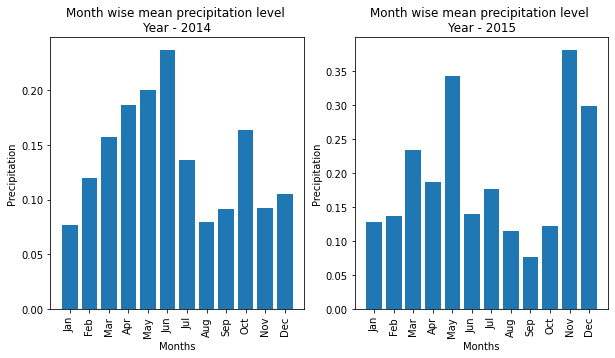

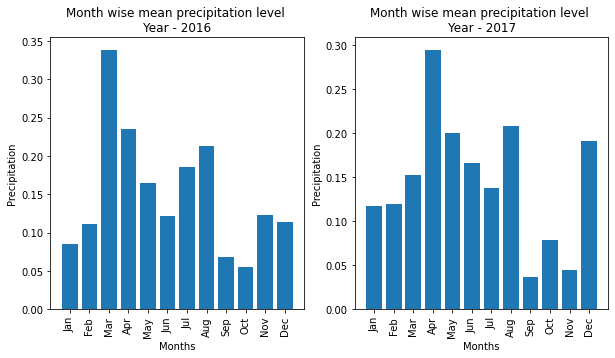

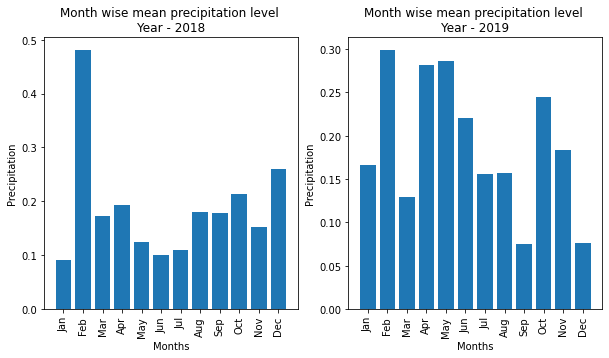

Text(0.5, 1.0, 'Month wise mean precipitation level \nYear - 2020')

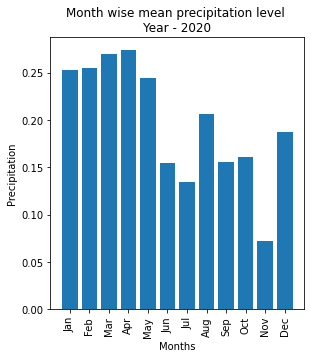

In [ ]:
ar_monthly = precipitation.groupby(['Year','Month']).mean().reset_index()
# print(ar_monthly)

df_2010 = ar_monthly.iloc[0:12,:].reset_index()
df_2011 = ar_monthly.iloc[12:24,:].reset_index()
df_2012 = ar_monthly.iloc[24:36,:].reset_index()
df_2013 = ar_monthly.iloc[36:48,:].reset_index()
df_2014 = ar_monthly.iloc[48:60,:].reset_index()
df_2015 = ar_monthly.iloc[60:72,:].reset_index()
df_2016 = ar_monthly.iloc[72:84,:].reset_index()
df_2017 = ar_monthly.iloc[84:96,:].reset_index()
df_2018 = ar_monthly.iloc[96:108,:].reset_index()
df_2019 = ar_monthly.iloc[108:120,:].reset_index()
df_2020 = ar_monthly.iloc[120:132,:].reset_index()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df_2010['Month'].astype(str), df_2010['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2010')


plt.subplot(1,2,2)
plt.bar(df_2011['Month'].astype(str), df_2011['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2011')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df_2012['Month'].astype(str), df_2012['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2012')

plt.subplot(1,2,2)
plt.bar(df_2013['Month'].astype(str), df_2013['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2013')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df_2014['Month'].astype(str), df_2014['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2014')

plt.subplot(1,2,2)
plt.bar(df_2015['Month'].astype(str), df_2015['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2015')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df_2016['Month'].astype(str), df_2016['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2016')

plt.subplot(1,2,2)
plt.bar(df_2017['Month'].astype(str), df_2017['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2017')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df_2018['Month'].astype(str), df_2018['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2018')

plt.subplot(1,2,2)
plt.bar(df_2019['Month'].astype(str), df_2019['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2019')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df_2020['Month'].astype(str), df_2020['Precipitation'])
plt.xticks(list(range(0, 12)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
plt.xlabel("Months")
plt.ylabel('Precipitation')
plt.title('Month wise mean precipitation level \nYear - 2020')



    Year   LATITUDE  LONGITUDE  Precipitation  Month
0   2010  34.897988 -92.433394       0.121036    6.5
1   2011  34.897988 -92.433394       0.167213    6.5
2   2012  34.897988 -92.433394       0.119740    6.5
3   2013  34.897988 -92.433394       0.156348    6.5
4   2014  34.897988 -92.433394       0.137154    6.5
5   2015  34.897988 -92.433394       0.194610    6.5
6   2016  34.897988 -92.433394       0.151175    6.5
7   2017  34.897988 -92.433394       0.145322    6.5
8   2018  34.897988 -92.433394       0.188135    6.5
9   2019  34.897988 -92.433394       0.189599    6.5
10  2020  34.897988 -92.433394       0.197017    6.5


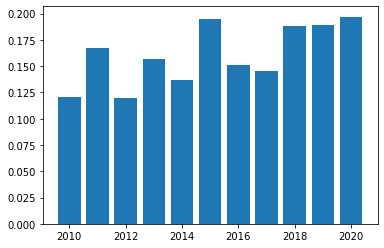

In [ ]:
yearly_avg = precipitation.groupby('Year').mean().reset_index()
print(yearly_avg)
plt.bar(yearly_avg['Year'], yearly_avg['Precipitation'])
plt.show()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


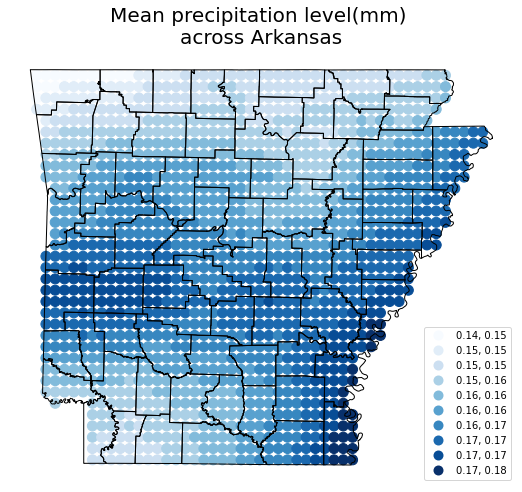

In [ ]:
# max_prec_by_geom = precipitation.groupby(['Longitude','Latitude'])['Precipitation'].describe()
max_prec_by_geom = precipitation.groupby(['LONGITUDE','LATITUDE'])['Precipitation'].mean().reset_index()
# print(max_prec_by_geom)
points = [Point(xy) for xy in zip(max_prec_by_geom["LONGITUDE"], max_prec_by_geom["LATITUDE"])]
geo_df = gpd.GeoDataFrame(max_prec_by_geom, crs={'init': 'epsg:4326'}, geometry = points)

ax = geo_df.plot( column='Precipitation', 
                 markersize = 100, 
                 cmap = 'Blues',
                 legend = True, 
                 vmin = 0.0,
                 scheme="equal_interval",
                 k=10,
                 figsize = (12, 8))


arkansas.plot(ax = ax, linewidth = 1, color = '#00000000', edgecolor = 'black')
plt.title("Mean precipitation level(mm) \nacross Arkansas", fontsize = 20)

ax.axis('off')
plt.show()


         ID  ...      TYPE
0  63072758  ...  HOSPITAL
1  31233525  ...  HOSPITAL
2   7233484  ...  HOSPITAL
3  36034758  ...  HOSPITAL
4  36232068  ...  HOSPITAL

[5 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


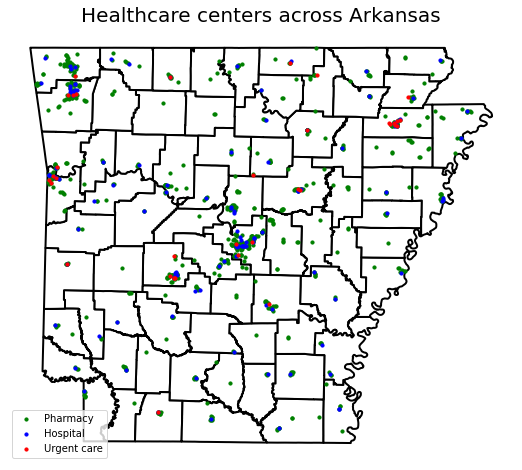

In [ ]:
ax = arkansas.plot(color = 'white', linewidth = 2, edgecolor = 'black', figsize = (12, 8))

centers = pd.read_csv("combined_data.csv")
print(centers.head())
centers_ar = centers[centers["STATE"] == "AR"]
points = [Point(xy) for xy in zip(centers_ar["LONGITUDE"], centers_ar["LATITUDE"])]
centers_ar = gpd.GeoDataFrame(centers_ar, crs = {'init': 'epsg:4326'}, geometry = points)

centers_ar[centers_ar["TYPE"] == "PHARMACY"].plot(color = 'green', ax = ax, markersize = 10, label='Pharmacy')
centers_ar[centers_ar["TYPE"] == "HOSPITAL"].plot(color = 'blue', ax = ax, markersize = 10, label='Hospital')
centers_ar[centers_ar["TYPE"] == "URGENT_CARE"].plot(color = 'red', ax = ax, markersize = 10, label='Urgent care')

plt.title("Healthcare centers across Arkansas", fontsize = 20)
ax.axis('off')
plt.legend()